In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
data_set= pd.read_csv("D:\Phyton excel\german_credit_data.csv")  
data_set.drop(['Unnamed: 0'], axis=1, inplace=True)
data_set.head()
data_set.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [4]:
data_set.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
data_set1 = data_set.select_dtypes(include=["number"])
data_set2 = data_set.select_dtypes(exclude=["number"])
num_col=data_set1.columns.tolist()
Category_col=data_set2.columns.tolist()
num_col

['Age', 'Job', 'Credit amount', 'Duration']

In [6]:
Category_col

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [7]:
data_set.loc[data_set['Risk'] =='good', 'Risk1'] = 1
data_set.loc[data_set['Risk'] =='bad', 'Risk1'] = 0
data_set.loc[data_set['Sex'] =='female', 'Sex1'] = 1
data_set.loc[data_set['Sex'] =='male', 'Sex1'] = 0
data_set.loc[data_set['Housing'] =='own', 'Housing1'] = 1
data_set.loc[data_set['Housing'] =='free', 'Housing1'] = 0
data_set.loc[data_set['Saving accounts'] =='little', 'Saving accounts1'] = 1
data_set.loc[data_set['Saving accounts'] =='moderate', 'Saving accounts1'] = 0
data_set.loc[data_set['Checking account'] =='little', 'Checking account1'] = 1
data_set.loc[data_set['Checking account'] =='moderate', 'Checking account1'] = 0
data_set = data_set.fillna(0)
data_set.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Risk1,Sex1,Housing1,Saving accounts1,Checking account1
0,67,male,2,own,0,little,1169,6,radio/TV,good,1.0,0.0,1.0,0.0,1.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0.0,1.0,1.0,1.0,0.0
2,49,male,1,own,little,0,2096,12,education,good,1.0,0.0,1.0,1.0,0.0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1.0,0.0,0.0,1.0,1.0
4,53,male,2,free,little,little,4870,24,car,bad,0.0,0.0,0.0,1.0,1.0


In [8]:
from sklearn.model_selection import train_test_split
X= data_set.drop(['Risk','Sex','Housing','Saving accounts','Checking account','Purpose'], axis=1)
y= data_set['Risk1']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
#feature Scaling  
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
y_test
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [9]:
y_pred = knn.predict(X_test)

In [10]:
confusion_matrix(y_test, y_pred)

array([[ 84,   2],
       [  0, 214]], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9933333333333333

In [12]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([1.        , 0.99074074]),
 array([0.97674419, 1.        ]),
 array([0.98823529, 0.99534884]),
 array([ 86, 214], dtype=int64))

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9907407407407407

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

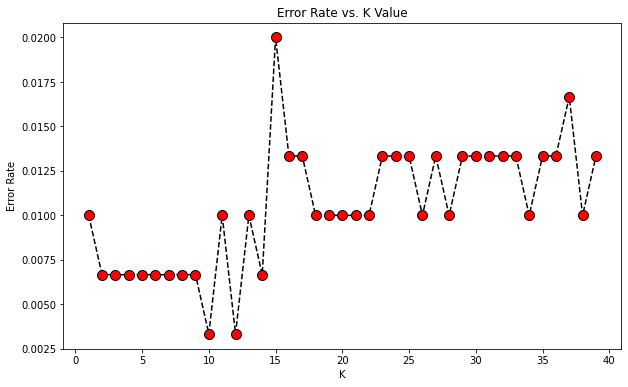

Minimum error:- 0.0033333333333332993 at K = 10


In [18]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [16]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [17]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9966666666666667